In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

## Coding part of Assignment 5

#### 1. Find the linear regression equation for this data.

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


* From the above table we can say that it is a continous data with one independent variable(Chirps/Second) and one dependent variable(Ground Temperature)

### Appling Simple Linear Regression Model(step by step(6 Jars of ML))

1.Data
* The data is cleaned.
* No encoding is required.
2.Task
* Task here is Supervised Learning - Simple Linear Regression.
3.Model 
* The model for Simple Linear Regression is **y=m*x+c**. we need to check linear relation in this dataset using visulaization technique whether it forms a linear relation or not.
* If there is no linear relation then we need to transform the data and check.
4.Loss function
* The most commonly used loss function for Linear Regression is Least Squared Error, and its cost function is also known as Mean Squared Error(MSE)
5.Learning
* Done by the Model Automatically
6.Evaluation Metric
* r2 score

#### Ploting the data to check Linear Relation.

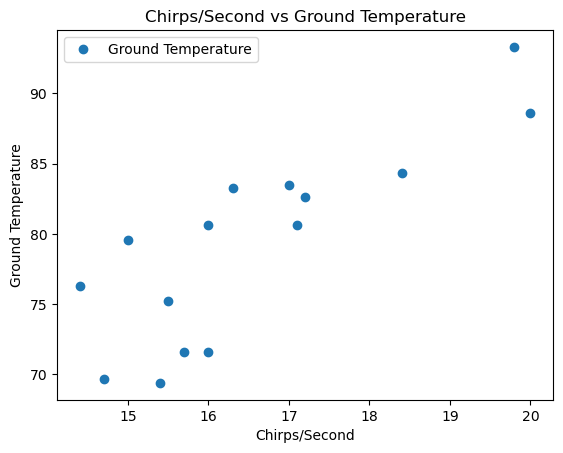

In [4]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [5]:
df.corr()
# the corr value 0.832 denotes a strong positive relation.

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


* There is a strong linear relationship between Chirps/second and the Temperature.so no transformation is required.

#### Spliting the data


In [6]:
x = df.iloc[:, :-1].values #INDEPENDENT VARIABLE.
y = df.iloc[:, 1].values #DEPENDENT VARIABLE.
#Spliting the dataset in to x_train,x_test,y_train and y_test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

#### Modelling and fitting the data

In [7]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() # Model for Learning the M and c
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Fitting the Data in the model ,training and Learning.

LinearRegression()

In [8]:
c=regressor.intercept_
m=regressor.coef_
print(m,c)

[3.41390608] 23.031752821259566


#### Predicting 

In [9]:
y_pred = regressor.predict(X_test) #it will give the final predictions
y_pred
df1=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
df1

,y_test,y_pred
0,84.3,85.847625
1,71.6,76.630078
2,80.6,77.654250


#### The Simple Linear Regression equation for Cricket chirps/second vs Temperature dataset**(hat{y}=3.4*Chirps/second + 23)**

#### 2.Chart the original data and the equation on the chart

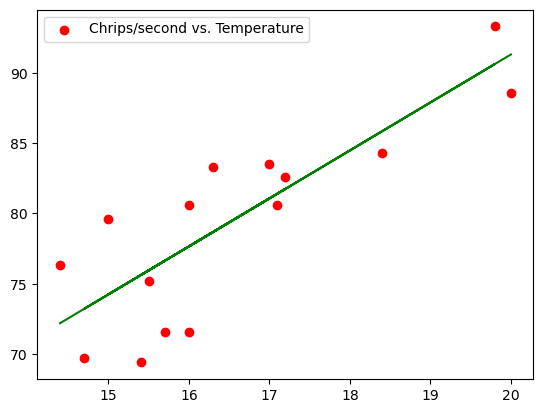

In [10]:
plt.scatter(x, y,c='r' ,label='Chrips/second vs. Temperature')
plt.plot(x, m*x + c,color='g')
plt.legend()
plt.show()

#### 3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.5737056951107298

#### R2 score is 0.57 it means the equation is not a good fit for the model.Since there is low number of data points available for training and testing.We can increase R2 score if we take the data only for training.

In [14]:
#We are considering all the datapoints for training.
a = df[['Ground Temperature']]
b = df['Chirps/Second']
regression=linear_model.LinearRegression()
regression.fit(a,b)
print('intercept:', regression.intercept_)
print('coefficient:', regression.coef_) 

intercept: 0.4593146452359562
coefficient: [0.20299973]


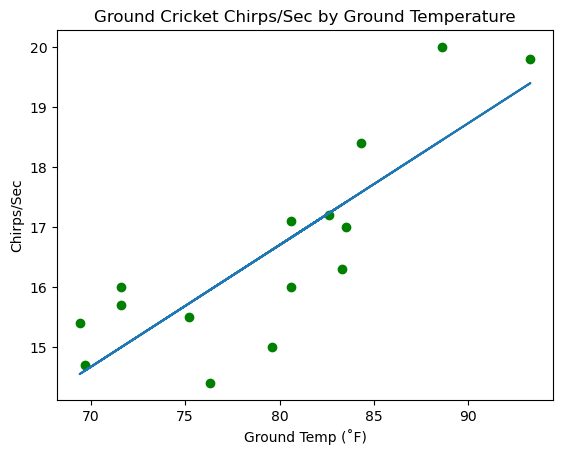

In [16]:
plt.scatter(a, b, color='g')
plt.plot(a, regression.predict(a))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [17]:
print('r-squared:',regression.score(a,b))

r-squared: 0.6922946529147


#### 4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [18]:
t=regression.predict([[95]])
print('At 95˚F, the approximation of chirps/sec is:',int(t))

At 95˚F, the approximation of chirps/sec is: 19


C:\Users\kisho\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [20]:
r=(18 - regression.intercept_) / regression.coef_
print('With an observation of 18 chirps/sec,we expect a ground temperature of =',"{:.4f}".format(float(r)),'F')

With an observation of 18 chirps/sec,we expect a ground temperature of = 86.4074 F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [3]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


#### 1. Find the linear regression equation for this data for brain weight to body weight.

In [14]:
#spliting the dataset
x = df[['Body']]
y = df['Brain']

In [15]:
#modelling
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [17]:
print('intercept:', regressor.intercept_)
print('coefficient:', regressor.coef_)

intercept: -56.85554542859637
coefficient: [0.90291295]


* The Linear Regression equation for Brain vs.Body Weight dataset is **(hat{y}=0.902*Bodyweight+ -56.855)**

#### 2.Chart the original data and the equation on the chart.

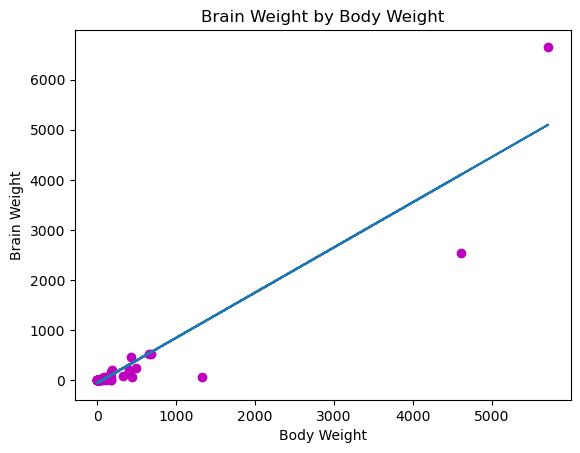

In [18]:
plt.scatter(x, y, color='m')
plt.plot(x, regressor.predict(x))
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

#### 3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [23]:
print('R Square score for this equation:','%.3f' % regressor.score(x, y))

R Square score for this equation: 0.873


* The $R^2$ score is greater than 0.8.so the equation is a good fit for this data.

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [3]:
data = pd.read_fwf("salary.txt", header=None,names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
data.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [3]:
data.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [4]:
data.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


#### Spliting the data

In [5]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

#### Modelling

In [6]:
regressor = linear_model.LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [7]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
print('Features & Coefficients',list(zip(feature, regressor.coef_)))

Features & Coefficients [('Sex', array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354]))]


In [8]:
regressor.intercept_

array([11410.14654726])

**Linear Regression equation [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341-128.79057354] + 11410.14654725559**

In [9]:
print('The equation for columns {} with respect to Salary:\n''{} + {}'.format(feature, regressor.coef_,regressor.intercept_))

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]] + [11410.14654726]


In [10]:
def lin_r2(feature, data, sal='Salary'):
    input = data[feature]
    output = data[sal]
    regressor = linear_model.LinearRegression()
    regressor.fit(input,output)
    return regressor.score(input,output)

In [11]:
print('R^2 score for equation using all columns: {}'.format(lin_r2(feature,data)))

R^2 score for equation using all columns: 0.8547180674410969


**Selection of columns with best R2 score**

In [12]:
import itertools as it

In [13]:
#itertools.combinations() module in Python to print all possible combinations
def get_combo(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combo(feature)

In [14]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_r2(list(n), df, focus)] = n
    return combo_scores

In [16]:
combo_scores = all_combo_scores(combos, data)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485598, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264598, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153612, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907434, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533505, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

**R2 score including all independent variables = 0.8547 but there is two dominant factors Rank & Year itself scores 0.8436**

**3.Report whether sex is a factor in salary.**

**Sex on its own has a score very close to zero (0.063898925832880038), indicating that it has no direct influence on salary.**